# Лабораторная работа №1

**Точное решение задачи о разделении облаков**

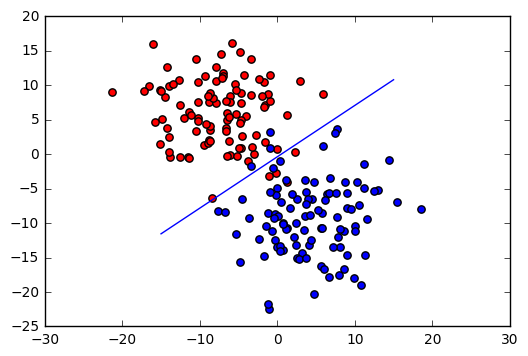

In [29]:
from matplotlib import pyplot
import numpy
import random

POINTS_NUMBER = 100
MAX_X = 15
mu1_x = -random.uniform(3, 10)
mu2_x = random.uniform(3, 10)
mu1_y = random.uniform(-3, 10)
mu2_y = random.uniform(-10, 3)
sigma = 5
first_cloud = numpy.array([numpy.random.normal(mu1_x, sigma, POINTS_NUMBER), 
                           numpy.random.normal(mu1_y, sigma, POINTS_NUMBER),
                          [1] * POINTS_NUMBER])
p1 = pyplot.scatter(first_cloud[0], first_cloud[1], 28, "red")
second_cloud = numpy.array([numpy.random.normal(mu2_x, sigma, POINTS_NUMBER), 
                            numpy.random.normal(mu2_y, sigma, POINTS_NUMBER),
                           [1] * POINTS_NUMBER])
p2 = pyplot.scatter(second_cloud[0], second_cloud[1], 28, "blue")

X = numpy.vstack((first_cloud.transpose(), second_cloud.transpose()))
X_t = X.transpose()
Y = (numpy.hstack(([-1] * POINTS_NUMBER, [1] * POINTS_NUMBER))).transpose()
w = numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X_t, X)), X_t), Y)
w_r = w[:2]
Point1 = [-MAX_X, (-w[2] + w[0] * MAX_X) / w[1]]
Point2 = [MAX_X, (-w[2] - w[0] * MAX_X) / w[1]]

pyplot.plot([Point1[0], Point2[0]], [Point1[1], Point2[1]])

pyplot.show()

Несложно видеть, что если всего точек было $n$, то сложность обучения составляет $O(n)$. Действительно, мы проделываем константное количество операций с матрицами, при этом все матрицы (в том числе получаемые) имеют либо константную ширину, либо константную высоту. Это означает, что каждое умножение матриц - это несколько (константное кол-во) скалярных умножений строки на столбец. Размеры столбцов и строк матриц не превосходят $n$. То есть перемножение матриц происходит за $O(const\cdot n)$.

**Задание 2**

1) Пусть $P\{y=1|x\} = \sigma(wx+b)$, где $\sigma(z) = \frac{1}{1 + \exp(-z)}$. Покажем, что задача
<center>$ \arg\min_{w, b} \sum_{x, y} \ln(1 + \exp(-y(wx + b)))$</center>
есть не что иное, как максимизация правдоподобия.

$\sum_{x, y}\ln(1+\exp(-y(wx+b)))=\ln \prod_{x, y}(1+\exp(-y(wx+b)))$. Значит, надо показать, что максимизация $\prod_{x, y}(1+\exp(-y(wx+b)))$ - это максимизация правдоподобия (благо это произведение $>1$ => можно логарифм убрать).

Пусть $y_i=1$. Тогда хочется сделать вероятность $P(y_i=1|x_i)$ как можно больше. То есть, надо максимизировать $\frac1{1+\exp(-(wx_i+b))}$. Но заметим, что это $=\frac1{1+\exp(-y_i(wx_i+b))}$, а это множитель из нашего произведения. Понятно, что максимизация правдоподобия для этих $x_i$ равносильна максимизации $\prod_{x_i: y_i=1} \frac1{1+\exp(-y_i(wx_i+b))}$. Это произведение равно вероятности, что данные $y_i$ будут равны 1 при данных $w, b$.

Теперь рассмотрим оставшиеся $y_i=-1$. Хотим сделать $P(y_i=1|x_i)$ как можно меньше. То есть, надо минимизировать $\frac1{1+\exp(-(wx_i+b))}$. Но заметим, что это $=\frac1{1+\exp(y_i(wx_i+b))}$ (в этот раз уже без минуса, поскольку $y_i$ у нас сейчас равен -1). Заметим, что минимизация этого выражения равносильна максимизации выражения $\frac1{1+\exp(-y_i(wx_i+b))}$ (это следует из монотонности экспоненты). Тогда максимизация правдоподобия в этом случае равносильна максимизации произведения $\prod_{x_i: y_i=-1} \frac1{1+\exp(-y_i(wx_i+b))}$. Это произведение равно вероятности, что данные $y_i$ будут равны -1 при данных $w, b$.

Понятно, что тогда вероятность, что все $x_i$ будут принадлежать к соответствующему классу, будет наибольшей, когда произведение $P(y_i=\ldots|x_i)$ будет наибольшим, т.е. когда $\prod_x(1+\exp(-y(x)\cdot(wx+b)))$ максимально, что и требовалось доказать

2) Ниже отображен график для функционалов

$Q(w) = \frac{1}{\mathcal{l}} \sum_{i=1}^{\mathcal{l}} max(0, 1 - y_i\cdot(wx_i + b))$ (зеленый);

$Q(w) = \frac{1}{\mathcal{l}} \sum_{i=1}^{\mathcal{l}} \ln(1 + \exp(-y_i\cdot(wx_i + b)))$ (синий);

$Q(w) = \frac{1}{\mathcal{l}} \sum_{i=1}^{\mathcal{l}}((wx_i+b) - y_i)^{2}$ (красный) - при $y_i=1$

при $l$ = 1.

Видно, что графики 1 и 2 очень похожи при $M=y(wx+b)<<0$, и их производные при стремлении к $-\inf$ приближаются к $-M$. График 3 является параболой, при $y=-1$ ее основание будет в точке $(-1, 0)$.

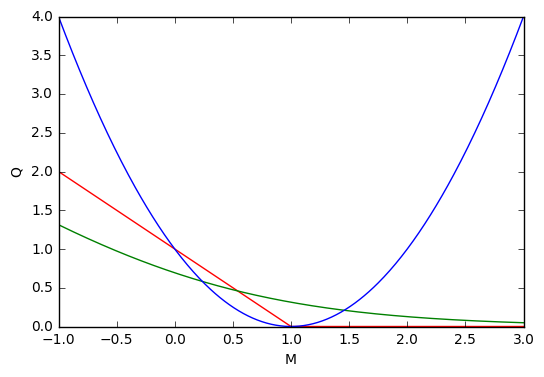

In [117]:
from matplotlib import pyplot, mlab
from numpy import linalg, random
import random
import copy
import math

dx = 0.01
Mx_min = -1 #M=y(x)*(wx+b)
Mx_max = 3
Mx_list = mlab.frange(Mx_min, Mx_max, dx)
Q1_list = [max(0, 1 - M) for M in Mx_list]
Q2_list = [math.log(1 + math.exp(-M)) for M in Mx_list]
Q3_list = [(M-1)**2 for M in Mx_list]
pyplot.plot(Mx_list, Q1_list, "red")
pyplot.plot(Mx_list, Q2_list, "green")
pyplot.plot(Mx_list, Q3_list, "blue")
pyplot.xlabel("M")
pyplot.ylabel("Q")
pyplot.show()

**Метод градиентного спуска**

Ниже приведен код, который находит минимум квадратичной функции $f(x,y)=2x^2+y^2$ с помощью градиентного спуска. Синим значением показаны линии уровня, красной линией - траектория при работе алгоритма. Значение $\lambda$ уменьшается в 2 раза, если алгоритм понимает, что перепрыгнул минимум.

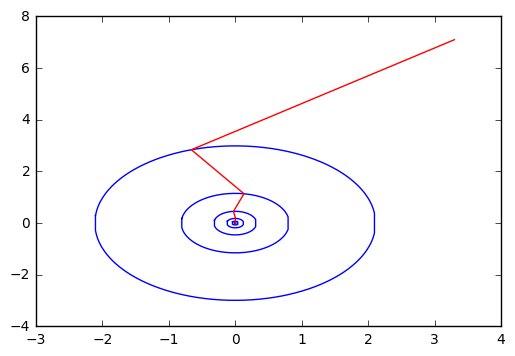

In [32]:
from matplotlib import pyplot, mlab
import numpy
import math


def f(x, y):
    return 2 * (x**2) + y**2 + 2


def x_derivative(x, y):
    return 4 * x


def y_derivative(x, y):
    return 2 * y


x = 3.3
y = 7.1
learning_rate = 0.3
eps = 0.01
list_x = [x]
list_y = [y]
while (learning_rate > eps):
    gradient = (x_derivative(x, y), y_derivative(x, y))
    x_new = x - learning_rate * gradient[0]
    y_new = y - learning_rate * gradient[1]
    if (f(x_new, y_new) >= f(x, y)):
        learning_rate *= 0.5
    (x, y) = (x_new, y_new)
    list_x += [x]
    list_y += [y]
    level = f(x, y)
    level_points_x = mlab.frange(-math.sqrt((level-2) / 2) + 0.01, math.sqrt((level-2) / 2) - 0.01, 0.02)
    level_points_y = []
    for i in range(0, len(level_points_x)):
        p = level_points_x[i]
        if (level - 2.0 * p * p - 2.0) > 0:
            level_points_y += [(level - 2.0 * p * p - 2.0) ** 0.5]
    for i in range(len(level_points_x) - 1, -1, -1):
        p = level_points_x[i]
        if (level - 2.0 * p * p - 2.0) > 0:
            level_points_y += [-((level - 2.0 * p * p - 2.0) ** 0.5)]
    if (len(level_points_y) > 0):
        level_points_y += [level_points_y[0]]
        level_points_x = numpy.hstack((level_points_x, level_points_x[::-1], level_points_x[0]))
        if (len(level_points_x) == len(level_points_y) > 0):
            pyplot.plot(level_points_x, level_points_y, "blue")
pyplot.plot(list_x, list_y, "red")
pyplot.show()

**Функция Розенблока и проблемы с ней**

Ниже приведен код, который находит минимум у функции Розенброка, которая равна $f(x, y) = (1-x)^2+100(y-x^2)^2$. Сразу отметим проблемы, связанные с этой функцией:

1. У нее очень быстро растет градиент по мере удаления от минимума. Это значит, что нужно брать $\lambda<<1$. Очевидно, что это не решает проблем. Если для функции выше мы могли изменять $\lambda$ более-менее когда угодно, то здесь мы вынуждены переходить в новое положение только тогда, когда там значение лучше, чем в текущем (то есть мы вынуждены так уменьшить $\lambda$ перед каждым шагом, чтобы мы стали ближе к минимуму). В противном случае (легко проверить, просто убрав $else$ и вынеся строки из-под него как всегда выполняющиеся в цикле) мы рискуем каждый раз все сильнее удаляться от минимума, и за несколько шагов можем легко получить такие огромные числа, что даже Python не умеет их обрабатывать.

2. Существует область, где функция изменяется довольно медленно (подробнее - в википедии, на графике у меня тоже отмечены линии уровня для $f = 1, 5, 10$). Это означает, что, попав в эту область при маленьком значении $\lambda$, мы рискуем не дойти быстро до глобального минимума.

Идея 1: давайте действительно будем переходить в новое значение, только если значение в нем лучше.

Идея 2: давайте при переходе в новое значение будем немного увеличивать $\lambda$, а иначе довольно сильно уменьшать.

Идея 3: давайте будем нормализовывать градиент. Тогда в областях с очень сильным и очень слабым ростом функции наш алгоритм будет более стабилен в плане скорости изменения координат. Однако, в этой идее есть минус: чтобы дойти до минимума, надо поставить ограничение на значение $\lambda$ (порог, когда мы останавливаемся) очень маленькое. В частности, для реализации этой идеи в коде ниже пришлось уменьшить значение $eps$ (порог) в 100 раз, но точность ответа все равно осталась довольно низка.

Ответ: 0.9981513761368599 0.9963025392641786
Количество шагов (в том числе и без переходов в новую точку, а просто с изменением _lambda): 6283


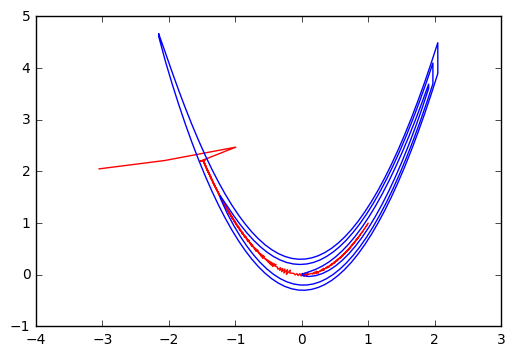

In [31]:
from matplotlib import pyplot, mlab
import numpy
import math


def f(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2


def x_derivative(x, y):
    return 2 * (-1 + x + 200 * x**3 - 200 * x * y)


def y_derivative(x, y):
    return 200 * (y - x**2)


def normalize(x, y):
    len = (x**2 + y**2)**0.5
    return (x / len, y / len)


x = -3.05
y = 2.05
learning_rate = 1
eps = 0.000005
list_x = [x]
list_y = [y]
steps = 0
while (learning_rate > eps):
    #gradient = (x_derivative(x, y), y_derivative(x, y))
    gradient = normalize(x_derivative(x, y), y_derivative(x, y))
    x_new = x - learning_rate * gradient[0]
    y_new = y - learning_rate * gradient[1]
    if (f(x_new, y_new) >= f(x, y)):
        learning_rate *= 0.5
    else:
        learning_rate *= 1.1
        (x, y) = (x_new, y_new)
        list_x += [x]
        list_y += [y]
    steps += 1
pyplot.plot(list_x, list_y, "red")
print("Ответ:", x, y)
print("Количество шагов (в том числе и без переходов в новую точку, а просто с изменением _lambda):", steps)
levels = [1, 5, 10]
for lev in levels:
    list_x = mlab.frange(-(math.sqrt(lev) - 1) + 0.01, min(2, math.sqrt(lev) + 1 - 0.1), 0.1)
    list_y1 = [math.sqrt((lev - (1-p)**2) / 100) + p**2 for p in list_x]
    list_y2 = [-math.sqrt((lev - (1-p)**2) / 100) + p**2 for p in list_x]
    list_y = numpy.hstack((list_y1, list_y2[::-1], list_y1[0]))
    list_x = numpy.hstack((list_x, list_x[::-1], list_x[0]))
    pyplot.plot(list_x, list_y, "blue")
pyplot.show()

На графике выше синим цветом обозначены 3 линии уровня (для $f=1,5,10$); красной линией обозначено, как в процессе работы изменяются значения текущих координат. Видно, что после довольно короткого числа переходов мы долго идем по "плоской" области. Здесь и помогает небольшое увеличение $\lambda$ при каждом переходе, ускоряя время работы примерно в 4 раза.

Ускорение работы от первых 2 идей: примерно в 4 раза. Ускорение от третьей идеи: еще примерно в 8 раз, хотя снижается точность ответа\*. С другой стороны, 3-я идея избавляет от необходимости очень сильно уменьшать $\lambda$, поэтому в случае первых 2 идей все равно надо выставлять довольно маленькое $eps$, чтобы из исходной точки алгоритм попал в область маленьких значений.

\* - никакие приведенные выше утверждения об ускорении не гарантируются. Примерные значения получены путем проверки на нескольких начальных данных. Перед применением алгоритма проконсультируйтесь со специалистом.)))

**Методы градиентного и наискорейшего градиентного спусков. Сравнение**

Ниже приведен алгоритм, который разделяет 2 облака точек тремя способами: с помощью точного решения (бирюзовая линия), с помощью метода градиентного спуска (зеленая линия) и с помощью метода наискорейшего спуска (желтая линия). Также построены графики зависимости ошибки Q от номера шага для последних двух методов (синяя и красная линии соответственно).

В последних методах использованы идеи о том, что алгоритм должен прекращать работу, если ошибка стала меньше заданного значения, или же если градиент стал очень мал.

Right answer:  [ 0.04437902 -0.08656504 -0.05765309] ;  err:  0.429822318487
Simple algo's answer:  [ 0.03824093 -0.08413661  0.0574515 ] ;  err:  1.13450435052
Steps:  11
Second algo's answer:  [ 0.04839587 -0.08247557  0.05819829] ;  err:  0.445355207396
Steps:  3


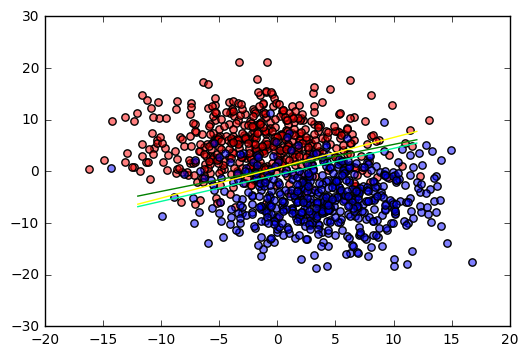

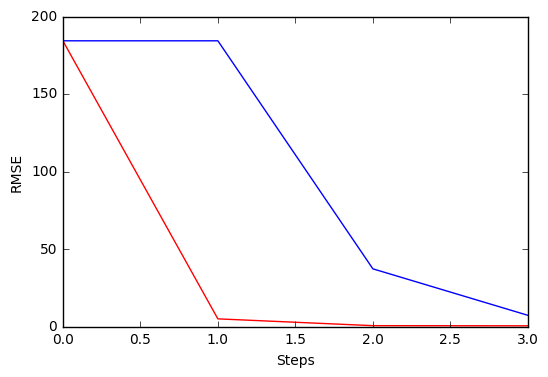

In [29]:
from matplotlib import pyplot
import numpy
import random
import copy
from scipy.optimize import minimize_scalar


def calculate_RMSE(w, X, Y):
    new_Q = 0
    for i in range(len(X)):
        new_Q += (numpy.dot(w, X[i]) - Y[i])**2
    new_Q /= (len(X))
    return new_Q


def calculate_RMSE_fixed(_lambda): #do not use it on your own
    global w
    global X
    global Y
    global gradient
    new_Q = 0
    for i in range(len(X)):
        tmp_grad = gradient * numpy.array([_lambda] * len(gradient))
        new_Q += (numpy.dot(w - tmp_grad, X[i]) - Y[i])**2
    new_Q /= (len(X))
    return new_Q


def normalize(v):
    len = 0
    for coord in v:
        len += coord**2
    len **= 0.5
    if (len > 0):
        return v * (1 / len)
    return v


def get_lambda_to_optimize_RMSE(w, X, Y, gradient): #just calculate derivative and compare it with 0 to find best _lambda
    denominator = 0
    numenator = 0
    for point in X:
        denominator += numpy.dot(gradient, point) ** 2
    for i in range(0, len(X)):
        numenator += (numpy.dot(w, X[i]) - Y[i]) * numpy.dot(gradient, X[i])
    return numenator / denominator


POINTS_NUMBER = 500
MAX_X = 12
mu1_x = -random.uniform(1, 8)
mu2_x = random.uniform(1, 8)
mu1_y = random.uniform(-1, 10)
mu2_y = random.uniform(-10, 1)
sigma = 5
first_cloud = numpy.array([numpy.random.normal(mu1_x, sigma, POINTS_NUMBER), 
                           numpy.random.normal(mu1_y, sigma, POINTS_NUMBER),
                          [1] * POINTS_NUMBER])
p1 = pyplot.scatter(first_cloud[0], first_cloud[1], 28, (1, 0, 0, 0.5))
second_cloud = numpy.array([numpy.random.normal(mu2_x, sigma, POINTS_NUMBER), 
                            numpy.random.normal(mu2_y, sigma, POINTS_NUMBER),
                           [1] * POINTS_NUMBER])
p2 = pyplot.scatter(second_cloud[0], second_cloud[1], 28, (0, 0, 1, 0.5))

X = numpy.vstack((first_cloud.transpose(), second_cloud.transpose()))
X_t = X.transpose()
Y = (numpy.hstack(([-1] * POINTS_NUMBER, [1] * POINTS_NUMBER))).transpose()
w = numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X_t, X)), X_t), Y)
RMSE_loss = calculate_RMSE(w, X, Y)
Point1 = [-MAX_X, (-w[2] + w[0] * MAX_X) / w[1]]
Point2 = [MAX_X, (-w[2] - w[0] * MAX_X) / w[1]]
pyplot.plot([Point1[0], Point2[0]], [Point1[1], Point2[1]], '#00fa9a')
print("Right answer: ", w, ";  err: ", RMSE_loss)

w = numpy.array([1.4532, -1.245, 0.1057])
learning_rate = 1
eps = 0.05
RMSE_loss = 0
for i in range(len(X)):
    RMSE_loss += (numpy.dot(w, X[i]) - Y[i])**2
RMSE_loss /= (len(X))
rmse_list1 = [RMSE_loss]
steps1 = 0
while RMSE_loss > eps and steps1 < 100:
    gradient = numpy.array([0, 0, 0])
    for i in range(0, len(X)):
        for j in range(0, len(gradient)):
            gradient[j] += (2 * X[i][j] * (numpy.dot(w, X[i]) - Y[i]))
    gradient = gradient / len(X)
    if (numpy.dot(gradient, gradient) < eps):
        break
    gradient = normalize(gradient)
    new_w = copy.copy(w)
    for i in range(len(new_w)):
        new_w[i] -= learning_rate * gradient[i]
    new_RMSE = calculate_RMSE(w, X, Y)
    if (new_RMSE >= RMSE_loss):
        learning_rate /= 2
    else:
        learning_rate *= 1.1 #optimization
    w = copy.copy(new_w)
    RMSE_loss = new_RMSE
    rmse_list1.append(RMSE_loss)
    steps1 += 1
Point1 = [-MAX_X, (-w[2] + w[0] * MAX_X) / w[1]]
Point2 = [MAX_X, (-w[2] - w[0] * MAX_X) / w[1]]
pyplot.plot([Point1[0], Point2[0]], [Point1[1], Point2[1]], "green")
print("Simple algo's answer: ", w, ";  err: ", RMSE_loss)
print("Steps: ", steps1)

w = numpy.array([1.4532, -1.245, 0.1057])
learning_rate = 0.5
eps = 0.05
RMSE_loss = 0
for i in range(len(X)):
    RMSE_loss += (numpy.dot(w, X[i]) - Y[i])**2
RMSE_loss /= (len(X))
rmse_list2 = [RMSE_loss]
steps2 = 0
while RMSE_loss > eps and steps2 < 20:
    gradient = numpy.array([0, 0, 0])
    for i in range(0, len(X)):
        for j in range(0, len(gradient)):
            gradient[j] += (2 * X[i][j] * (numpy.dot(w, X[i]) - Y[i]))
    gradient = gradient / len(X)
    if (numpy.dot(gradient, gradient) < eps):
        break
    gradient = normalize(gradient)
    learning_rate = get_lambda_to_optimize_RMSE(w, X, Y, gradient) #minimize_scalar(calculate_RMSE_fixed).x #deleted
    new_w = copy.copy(w)
    for i in range(len(new_w)):
        new_w[i] -= learning_rate * gradient[i]
    new_RMSE = calculate_RMSE(new_w, X, Y)
    w = copy.copy(new_w)
    RMSE_loss = new_RMSE
    rmse_list2.append(RMSE_loss)
    steps2 += 1
Point1 = [-MAX_X, (-w[2] + w[0] * MAX_X) / w[1]]
Point2 = [MAX_X, (-w[2] - w[0] * MAX_X) / w[1]]
pyplot.plot([Point1[0], Point2[0]], [Point1[1], Point2[1]], "yellow")
print("Second algo's answer: ", w, ";  err: ", RMSE_loss)
print("Steps: ", steps2)

pyplot.show()

steps = min(steps1, steps2) + 1
pyplot.plot([i for i in range(steps)], rmse_list1[:steps], "blue")
pyplot.plot([i for i in range(steps)], rmse_list2[:steps], "red")
pyplot.xlabel("Steps")
pyplot.ylabel("RMSE")
pyplot.show()


*И еще немного о проблемах градиентного спуска. Если у нас есть какие-то признаки, которые встречаются достаточно редко, то соответствующий столбец будет разреженным.
*

**Задание:
В чем заключается проблема?**

Разреженность столбца означает 2 вещи:

1. Малое количество данных по этому признаку

2. Превосходство значения "признак = 0" над другими

Из этого следует, что классификатор может очень легко переобучиться: либо он будет идеально подстроен под данные выборки для этого признака, либо (если столбец очень разреженный) может получиться, что признак не будет учитываться вовсе. 

Математическое обоснование этому таково: функция ошибки $Q$ будет очень медленно изменяться в направлении, соответствующем $i$-ому признаку в окрестности точки $w_i=0$. Тогда при недостаточном количестве шагов мы не дойдем до нужного значения по $i$-ому признаку. Если же шагов будет достаточно, то мы можем переобучить классификатор, то есть $w_i$ слишком сильно уйдет от значения в общем случае. 

**Стохастический градиентный спуск**

Код ниже обучает классификатор рукописных 0 и 1 из файла mnist под названием train.csv. Примерно половина (около 2000 из 4000) данных для каждой цифры взято в качестве обучающей выборки, оставшаяся часть не используется при обучении. Текущая версия алгоритма максимум дважды проходится по обучающей выборке. При обучении использованы встроенная функция scipy для нахождения минимума, с помощью нее находится оптимальный коэффициент скорости обучения на каждом шаге. Также можно заменить эту часть на обычное расписание изменения скорости обучения, но результат будет хуже (в зависимости от набора эвристик). Сразу отмечу довольно низкую скорость работы кода, связанную с необходимостью на каждом шаге считать ошибку на всех данных для составления графика.

Нарисованы графики зависимости ошибки на всех данных от количества просмотренных элементов, для разных размеров пакетов. Какая линия к какому размеру пакета относится, можно определить исходя из их взаимного расположения и напечатанных перед графиком данных. Несложно заметить, что если пакеты слишком маленькие, то обучение становится нестабильным из-за того, что вероятность, что некий существенный признак попадет в пакет, слишком низка. С другой стороны, на больших пакетах, хоть обучение и более стабильно, но скорость обучения сильно ниже, поскольку просто делается меньше шагов оптимизации. В данном случае оптимальный размер пакета - около 100. На пакетах меньшего размера качество обучения достаточно сильно зависит от изначальной позиции, которая генерируется случайным образом. Есть ощущение, что на пакетах большого размера встроенная в scipy функция минимизации работает хуже и может выдавать не оптимальный ответ (но это не точно).

4132 4684
Batch size:  40
Errors:  7 / 8816
Used elements:  8000
Batch size:  70
Errors:  7 / 8816
Used elements:  7980
Batch size:  100
Errors:  8 / 8816
Used elements:  8000
Batch size:  150
Errors:  11 / 8816
Used elements:  7950
Batch size:  200
Errors:  15 / 8816
Used elements:  8000
Batch size:  300
Errors:  16 / 8816
Used elements:  7800


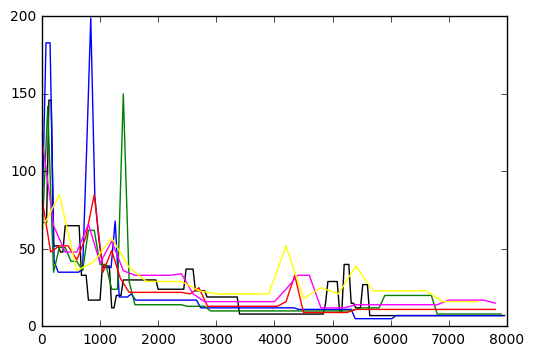

In [1]:
from matplotlib import pyplot, mlab
import numpy
import math
import random
import copy
from scipy.optimize import minimize_scalar


def get_logistic_func_derivative(w, X, Y):
    gradient = [0] * len(w)
    for i in range(0, len(X)):
        for j in range(0, len(gradient)):
            if (-Y[i] * numpy.dot(w, X[i]) > 10):
                gradient[j] += (-Y[i] * X[i][j])
            else:
                gradient[j] += math.exp(-Y[i] * numpy.dot(w, X[i])) / (1 + math.exp(-Y[i] * numpy.dot(w, X[i]))) * (-Y[i]) * X[i][j]
    return gradient


def calculate_logistic_func_error(w, X, Y):
    ans = 0
    for i in range(0, len(X)):
        if (-Y[i] * numpy.dot(w, X[i]) > 10):
            ans += (-Y[i] * numpy.dot(w, X[i]))
        else:
            ans += math.log(1 + math.exp(-Y[i] * numpy.dot(w, X[i])))
    return ans / len(X)


def calculate_logistic_func_error_fixed(learning_rate): #do not use it for your own
    global X
    global Y
    global w
    global gradient
    ans = 0
    for i in range(0, len(X)):
        if (-Y[i] * numpy.dot(numpy.array(w) - learning_rate * numpy.array(gradient), X[i]) > 10):
            ans += (-Y[i] * numpy.dot(numpy.array(w) - learning_rate * numpy.array(gradient), X[i]))
        else:
            ans += math.log(1 + math.exp(-Y[i] * numpy.dot(numpy.array(w) - learning_rate * numpy.array(gradient), X[i])))
    return ans / len(X)


def get_count_errors(w, X, Y):
    ans = 0
    for i in range(0, len(X)):
        if (numpy.dot(w, X[i]) * Y[i] < 0):
            ans += 1
    return ans


def normalize(gradient):
    length = 0
    for i in range(len(gradient)):
        length += gradient[i]**2
    if (length == 0):
        return gradient
    for i in range(0, len(gradient)):
        gradient[i] /= length
    return gradient


input = open('train.csv', 'r')
s = input.readline()
s = input.readline()
first_group = [] #0
second_group = [] #1
while (len(s) > 1):
    elem = list(map(int, s.split(',')))
    if (len(elem) != 785):
        print("CRITICAL ERROR: THE PROGRAM CANNOT READ THIS FILE")
    elif (elem[0] == 0):
        tmp = elem[1:]
        tmp.append(1)
        first_group.append(tmp)
    elif (elem[0] == 1):
        tmp = elem[1:]
        tmp.append(1)
        second_group.append(tmp)
    s = input.readline()

print(len(first_group), len(second_group))

list_batch_size = [40, 70, 100, 150, 200, 300]
list_colors = ["black", "blue", "green", "red", "magenta", "yellow"]
list_results = []
for BATCH_SIZE in list_batch_size:
    print("Batch size: ", BATCH_SIZE)
    list_errors = []
    FEATURES_NUMBER = len(first_group[0])
    DATA_FOR_LEARNING_SIZE = 2050 #2050 from 1st and 2050 from 2nd
    MAX_NUMBER_STEPS = 8000 // BATCH_SIZE
    MIN_LOSS = 3
    MATRIX_FEATURES = numpy.vstack((numpy.array(first_group), numpy.array(second_group)))
    MATRIX_ANSWERS = [1] * len(first_group) + [-1] * len(second_group)

    steps = 0
    w = numpy.array([random.random() for i in range(FEATURES_NUMBER)])
    learning_rate = 0.25
    logistic_loss = 1000000000000
    general_logistic_loss = MIN_LOSS + 100;
    while (steps < MAX_NUMBER_STEPS and general_logistic_loss > MIN_LOSS): #means that there are used (BATCH_SIZE * MAX_NUMBER_OF_STEPS) % DATA_FOR_LEARNING_SIZE elems from data
        X = numpy.empty((BATCH_SIZE, 785))
        Y = []
        for i in range(0, BATCH_SIZE // 2):
            index = (steps * BATCH_SIZE // 2 + i) % DATA_FOR_LEARNING_SIZE
            X[i * 2] = numpy.array(first_group[index % len(first_group)])
            Y.append(1)
            X[i * 2 + 1] = numpy.array(second_group[index % len(second_group)])
            Y.append(-1)
        if (len(X) != BATCH_SIZE):
            print("CRITICAL ERROR")
            break
        logistic_loss = calculate_logistic_func_error(w, X, Y)
        gradient = (get_logistic_func_derivative(w, X, Y))
        if (learning_rate < 0.0001): #magic optimization. It really helps, if you don't use minimize_scalar!
            gradient = normalize(gradient)
        learning_rate = minimize_scalar(calculate_logistic_func_error_fixed).x
        new_w = copy.copy(w)
        for i in range(0, len(w)):
            new_w[i] -= learning_rate * gradient[i]
        w = copy.copy(new_w)
        logistic_loss = calculate_logistic_func_error(new_w, X, Y)
        steps += 1
        general_logistic_loss = get_count_errors(w, MATRIX_FEATURES, MATRIX_ANSWERS)
        #print(logistic_loss, learning_rate, calculate_logistic_func_error(new_w, X, Y), general_logistic_loss)
        list_errors.append(general_logistic_loss)
        #print(steps * 100 // MAX_NUMBER_STEPS, "%", sep = '')
    list_results.append(list_errors)
    print("Errors: ", general_logistic_loss, "/", len(first_group) + len(second_group))
    print("Used elements: ", steps * BATCH_SIZE)
for i in range(len(list_results)):
    pyplot.plot([list_batch_size[i] * j for j in range(0, len(list_results[i]))], list_results[i], list_colors[i])
pyplot.show()

Если мы применяем сглаживание с коэффициентом $\gamma$, то при фиксированных значениях ошибок $Q_{t-1}, Q(x_t)$ на шаге $t$ ошибка $Q_t$ зависит линейно от $\gamma$: чем больше $\gamma$, тем сильнее влияет значение ошибки на предыдущем шаге на значение на текущем.

Понятно, что сглаживание используется для батчей, чтобы усилить связь между их обработкой: за счет этого мы немного сглаживаем график зависимости общей ошибки от количества просмотренных элементов. Фактически, это некий аналог метода сохранения импульса. 

**Метод сохранения импульса**

Ниже приведен код, который для функции $Q(x, y) = 10x^2+y^2$ находит минимум двумя способами: с помощью просто наискорейшего спуска и с помощью наискорейшего спуска с сохранением импульса. Поскольку для этой функции метод сохранения импульса позволяет ОЧЕНЬ быстро приближаться в самом начале к искомому минимуму, то я отобразил 2 графика, чтобы линия графика метода с сохранением импульса не уходила мгновенно в 0.

Значение переменной $\gamma$ выбрано исходя из предположения, что импульс не должен быть слишком большим, но при этом должен быть ощутимым при вычислениях.

Ответ: 0.00011640186507394756 -0.001920630773720138
Количество шагов: 40


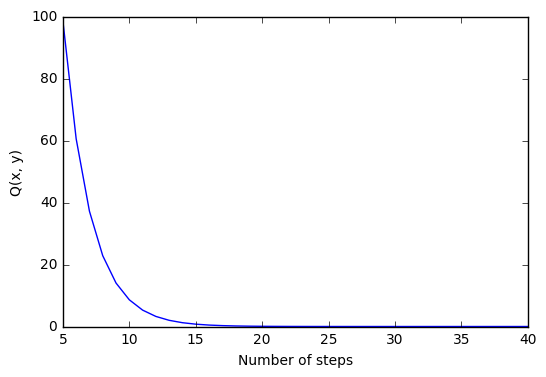

Ответ: 5.4486886429991766e-05 -0.0003058782314850992
Количество шагов: 18


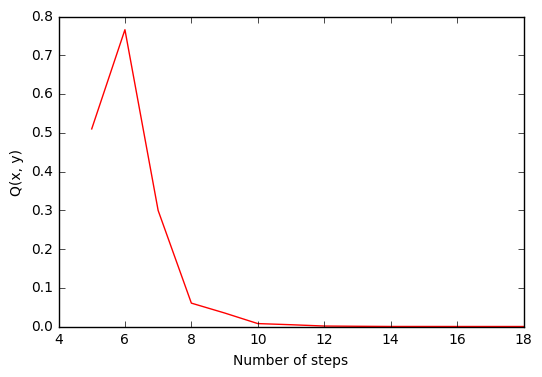

In [28]:
from matplotlib import pyplot, mlab
import numpy
import math
import copy


def f(x, y):
    return 10 * x**2 + y**2


def x_derivative(x, y):
    return 20 * x


def y_derivative(x, y):
    return 2 * y


def normalize(x, y):
    len = (x**2 + y**2)**0.5
    if (len > 0):
        return (x / len, y / len)
    return (0, 0)


def get_lambda_to_optimize_f(x, y, gradient):
    return (10 * x * gradient[0] + y * gradient[1]) / (10 * gradient[0]**2 + gradient[1]**2)


x = 2
y = -33
learning_rate = 1
eps = 0.00005
list_error = [f(x, y)]
steps = 0
while (learning_rate > eps):
    gradient = (x_derivative(x, y), y_derivative(x, y))
    if gradient[0]**2 + gradient[1]**2 < eps:
        break
    gradient = normalize(gradient[0], gradient[1])
    learning_rate = get_lambda_to_optimize_f(x, y, gradient)
    x_new = x - learning_rate * gradient[0]
    y_new = y - learning_rate * gradient[1]
    (x, y) = (x_new, y_new)
    list_error.append(f(x, y))
    steps += 1
print("Ответ:", x, y)
print("Количество шагов:", steps)

pyplot.xlabel("Number of steps")
pyplot.ylabel("Q(x, y)")
pyplot.plot(range(5, len(list_error)), list_error[5:], "blue")
pyplot.show()

_GAMMA = 0.1
x = 2
y = -33
eps = 0.00005
list_error = [f(x, y)]
steps = 0
learning_rate = 1
impulse = [0, 0]
while (learning_rate > eps):
    gradient = (x_derivative(x, y), y_derivative(x, y))
    if gradient[0]**2 + gradient[1]**2 < eps:
        break
    gradient = normalize(gradient[0], gradient[1])
    learning_rate = get_lambda_to_optimize_f(x, y, gradient)
    impulse[0] = _GAMMA * impulse[0] + learning_rate * gradient[0]
    impulse[1] = _GAMMA * impulse[1] + learning_rate * gradient[1]
    x_new = x - impulse[0]
    y_new = y - impulse[1]
    (x, y) = (x_new, y_new)
    list_error.append(f(x, y))
    steps += 1
print("Ответ:", x, y)
print("Количество шагов:", steps)

pyplot.xlabel("Number of steps")
pyplot.ylabel("Q(x, y)")
pyplot.plot(range(5, len(list_error)), list_error[5:], "red")
pyplot.show()

**Метод сохранения импульса и ускоренный градиент Нестерова: функция Розенблока**

Ниже приведен код, который применяет 2 различных метода для поиска минимума функции Розенброка: простой метод наискорейшего спуска с сохранением импульса и метод с ускоренным градиентом Нестерова. 

Видно, что хотя простой метод сохранения импульса работает немного быстрее, метод ускоренного градиента Нестерова делает график изменения ошибки более гладким. Кроме того, он гораздо быстрее приходит в область минимума, чем простой метод.

Ответ: 1.2189647611745773 1.4866438694085706
Лучшее значение:  0.0480046689701456  при x = 1.2189647611745773 , y = 1.4866438694085706
Количество шагов: 1000


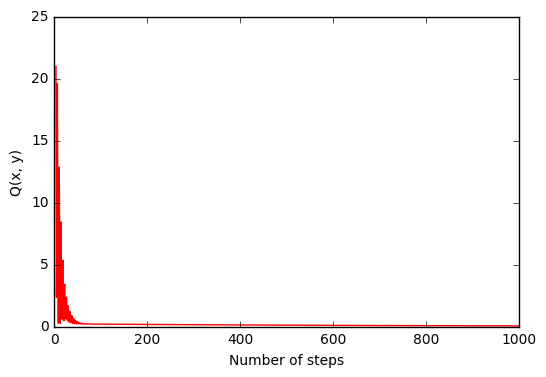

Ответ: 1.2571788924748535 1.5813819710653145
Лучшее значение:  0.06621898755581594  при x = 1.2571788924748535 , y = 1.5813819710653145
Количество шагов: 1000


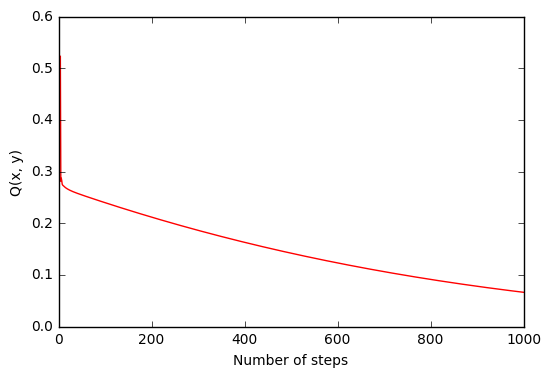

In [53]:
from matplotlib import pyplot, mlab
import numpy
import math
from scipy.optimize import minimize_scalar


def f(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2


def x_derivative(x, y):
    return 2 * (-1 + x + 200 * x**3 - 200 * x * y)


def y_derivative(x, y):
    return 200 * (y - x**2)


def normalize(x, y):
    len = (x**2 + y**2)**0.5
    return (x / len, y / len)


def calculate_error_fixed(_lambda): #do not use it on your own!
    global x
    global y
    global gradient
    return f(x - _lambda * gradient[0], y - _lambda * gradient[1])


_GAMMA = 0.9

x = 1.7
y = 2.3
eps = 0.01
list_error = [f(x, y)]
steps = 0
learning_rate = 0.0003
impulse = [0, 0]
best_result = [100000000000, (-100000, -100000)]
while (best_result[0] > eps and steps < 1000):
    gradient = (x_derivative(x, y), y_derivative(x, y))
    if gradient[0]**2 + gradient[1]**2 < eps:
        break
    #gradient = normalize(gradient[0], gradient[1])
    #learning_rate = minimize_scalar(calculate_error_fixed).x
    impulse[0] = _GAMMA * impulse[0] + learning_rate * gradient[0]
    impulse[1] = _GAMMA * impulse[1] + learning_rate * gradient[1]
    x_new = x - impulse[0]
    y_new = y - impulse[1]
    (x, y) = (x_new, y_new)
    if (f(x, y) < best_result[0]):
        best_result[0] = f(x, y)
        best_result[1] = (x, y)
    list_error.append(f(x, y))
    steps += 1
print("Ответ:", x, y)
print("Лучшее значение: ", best_result[0], " при x =", best_result[1][0], ", y =", best_result[1][1])
print("Количество шагов:", steps)

pyplot.xlabel("Number of steps")
pyplot.ylabel("Q(x, y)")
pyplot.plot(range(4, len(list_error)), list_error[4:], "red")
pyplot.show()

x = 1.7
y = 2.3
eps = 0.01
list_error = [f(x, y)]
steps = 0
learning_rate = 0.0003
impulse = [0, 0]
best_result = [100000000000, (-100000, -100000)]
while (best_result[0] > eps and steps < 1000):
    gradient = (x_derivative(x - impulse[0], y - impulse[1]), y_derivative(x - impulse[0], y - impulse[1]))
    if gradient[0]**2 + gradient[1]**2 < eps:
        break
    #gradient = normalize(gradient[0], gradient[1])
    #learning_rate = minimize_scalar(calculate_error_fixed).x
    impulse[0] = _GAMMA * impulse[0] + learning_rate * gradient[0]
    impulse[1] = _GAMMA * impulse[1] + learning_rate * gradient[1]
    x_new = x - impulse[0]
    y_new = y - impulse[1]
    (x, y) = (x_new, y_new)
    if (f(x, y) < best_result[0]):
        best_result[0] = f(x, y)
        best_result[1] = (x, y)
    list_error.append(f(x, y))
    steps += 1
print("Ответ:", x, y)
print("Лучшее значение: ", best_result[0], " при x =", best_result[1][0], ", y =", best_result[1][1])
print("Количество шагов:", steps)

pyplot.xlabel("Number of steps")
pyplot.ylabel("Q(x, y)")
pyplot.plot(range(4, len(list_error)), list_error[4:], "red")
pyplot.show()

**AdaGrad**

Ниже приведен код, сравнивающий качество работы обычного стохастического градиентного спуска и AdaGrad. Видно, что у AdaGrad есть проблемы, связанные с тем, что знаменатель у дроби очень быстро растет, и в итоге обучение может длиться долго. С другой стороны, фактически мы избавлены от необходимости придумывать расписание изменения скорости обучения. Также AdaGrad за счет накопления градиента может неплохо "выравниваться" (возвращаться к лучшему значению), если он от него ушел слишком далеко.

Для сравнения, в стохастическом спуске я не стал применять оптимизацию наискорейшего спуска. Сделал я это по причине того, что применять встроенные в scipy функции минимизации по аргументу не очень хорошо в данном сравнении, поскольку на самом деле это ощутимо замедляет работу алгоритма, и сравнивать качество в зависимости от просмотренных элементов не совсем корректно. В случае использования таких функций качество стохастического спуска лучше, чем у AdaGrad.

График зависимости ошибки от количества элементов (пакеты с элементами могут повторяться) для обычного спуска показан синим, для AgaGrad - красным.

4132 4684
Errors:  51 / 8816
Used elements:  8000
Errors:  16 / 8816
Used elements:  8000


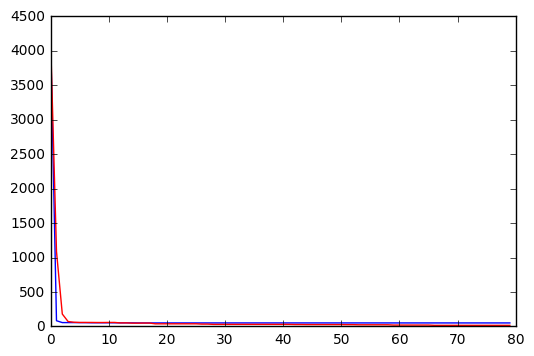

In [15]:
from matplotlib import pyplot, mlab
import numpy
import math
import random
import copy
from scipy.optimize import minimize_scalar


def get_logistic_func_derivative(w, X, Y):
    gradient = [0] * len(w)
    for i in range(0, len(X)):
        for j in range(0, len(gradient)):
            if (-Y[i] * numpy.dot(w, X[i]) > 10):
                gradient[j] += (-Y[i] * X[i][j])
            else:
                gradient[j] += math.exp(-Y[i] * numpy.dot(w, X[i])) / (1 + math.exp(-Y[i] * numpy.dot(w, X[i]))) * (-Y[i]) * X[i][j]
    return gradient


def calculate_logistic_func_error(w, X, Y):
    ans = 0
    for i in range(0, len(X)):
        if (-Y[i] * numpy.dot(w, X[i]) > 10):
            ans += (-Y[i] * numpy.dot(w, X[i]))
        else:
            ans += math.log(1 + math.exp(-Y[i] * numpy.dot(w, X[i])))
    return ans / len(X)


def calculate_logistic_func_error_fixed(learning_rate): #do not use it for your own
    global X
    global Y
    global w
    global gradient
    ans = 0
    for i in range(0, len(X)):
        if (-Y[i] * numpy.dot(numpy.array(w) - learning_rate * numpy.array(gradient), X[i]) > 10):
            ans += (-Y[i] * numpy.dot(numpy.array(w) - learning_rate * numpy.array(gradient), X[i]))
        else:
            ans += math.log(1 + math.exp(-Y[i] * numpy.dot(numpy.array(w) - learning_rate * numpy.array(gradient), X[i])))
    return ans / len(X)


def get_count_errors(w, X, Y):
    ans = 0
    for i in range(0, len(X)):
        if (numpy.dot(w, X[i]) * Y[i] < 0):
            ans += 1
    return ans


def normalize(gradient):
    length = 0
    for i in range(len(gradient)):
        length += gradient[i]**2
    if (length == 0):
        return gradient
    for i in range(0, len(gradient)):
        gradient[i] /= length
    return gradient


input = open('train.csv', 'r')
s = input.readline()
s = input.readline()
first_group = [] #0
second_group = [] #1
while (len(s) > 1):
    elem = list(map(int, s.split(',')))
    if (len(elem) != 785):
        print("CRITICAL ERROR: THE PROGRAM CANNOT READ THIS FILE")
    elif (elem[0] == 0):
        tmp = elem[1:]
        tmp.append(1)
        first_group.append(tmp)
    elif (elem[0] == 1):
        tmp = elem[1:]
        tmp.append(1)
        second_group.append(tmp)
    s = input.readline()

print(len(first_group), len(second_group))

BATCH_SIZE = 100
list_errors = []
FEATURES_NUMBER = len(first_group[0])
DATA_FOR_LEARNING_SIZE = 2050 #2050 from 1st and 2050 from 2nd
MAX_NUMBER_STEPS = 8000 // BATCH_SIZE
MIN_LOSS = 3
MATRIX_FEATURES = numpy.vstack((numpy.array(first_group), numpy.array(second_group)))
MATRIX_ANSWERS = [1] * len(first_group) + [-1] * len(second_group)

steps = 0
w = numpy.array([random.random() for i in range(FEATURES_NUMBER)])
learning_rate = 0.25
logistic_loss = 1000000000000
general_logistic_loss = MIN_LOSS + 100
while (steps < MAX_NUMBER_STEPS and general_logistic_loss > MIN_LOSS):
    X = numpy.empty((BATCH_SIZE, 785))
    Y = []
    for i in range(0, BATCH_SIZE // 2):
        index = (steps * BATCH_SIZE // 2 + i) % DATA_FOR_LEARNING_SIZE
        X[i * 2] = numpy.array(first_group[index % len(first_group)])
        Y.append(1)
        X[i * 2 + 1] = numpy.array(second_group[index % len(second_group)])
        Y.append(-1)
    if (len(X) != BATCH_SIZE):
        print("CRITICAL ERROR")
        break
    logistic_loss = calculate_logistic_func_error(w, X, Y)
    gradient = (get_logistic_func_derivative(w, X, Y))
    if (learning_rate < 0.0001): #magic optimization. It really helps, if you don't use minimize_scalar!
        gradient = normalize(gradient)
    #learning_rate = minimize_scalar(calculate_logistic_func_error_fixed).x
    new_w = copy.copy(w)
    for i in range(0, len(w)):
        new_w[i] -= learning_rate * gradient[i]
    if (calculate_logistic_func_error(new_w, X, Y) >= logistic_loss):
        learning_rate /= 2
    else:
        learning_rate *= 1.1
    w = copy.copy(new_w)
    logistic_loss = calculate_logistic_func_error(new_w, X, Y)
    steps += 1
    general_logistic_loss = get_count_errors(w, MATRIX_FEATURES, MATRIX_ANSWERS)
    list_errors.append(general_logistic_loss)
    #print(logistic_loss, learning_rate, calculate_logistic_func_error(new_w, X, Y), general_logistic_loss)
    #print(steps * 100 // MAX_NUMBER_STEPS, "%", sep = '')
print("Errors: ", general_logistic_loss, "/", len(first_group) + len(second_group))
print("Used elements: ", steps * BATCH_SIZE)
pyplot.plot([i for i in range(steps)], list_errors, "blue")

list_errors = []
steps = 0
G_matrix = numpy.zeros((FEATURES_NUMBER, FEATURES_NUMBER))
w = numpy.array([random.random() for i in range(FEATURES_NUMBER)])
learning_rate = 1
logistic_loss = 1000000000000
general_logistic_loss = MIN_LOSS + 100
eps = 0.01
while (steps < MAX_NUMBER_STEPS and general_logistic_loss > MIN_LOSS):
    X = numpy.empty((BATCH_SIZE, 785))
    Y = []
    for i in range(0, BATCH_SIZE // 2):
        index = (steps * BATCH_SIZE // 2 + i) % DATA_FOR_LEARNING_SIZE
        X[i * 2] = numpy.array(first_group[index % len(first_group)])
        Y.append(1)
        X[i * 2 + 1] = numpy.array(second_group[index % len(second_group)])
        Y.append(-1)
    if (len(X) != BATCH_SIZE):
        print("CRITICAL ERROR")
        break
    logistic_loss = calculate_logistic_func_error(w, X, Y)
    gradient = numpy.array(get_logistic_func_derivative(w, X, Y))
    G_matrix += gradient.transpose() * gradient
    new_w = copy.copy(w)
    for i in range(0, len(w)):
        new_w[i] -= learning_rate * gradient[i] / (math.sqrt(G_matrix[i][i]) + eps)
    w = copy.copy(new_w)
    logistic_loss = calculate_logistic_func_error(new_w, X, Y)
    steps += 1
    general_logistic_loss = get_count_errors(w, MATRIX_FEATURES, MATRIX_ANSWERS)
    #print(logistic_loss, learning_rate, general_logistic_loss)
    list_errors.append(general_logistic_loss)
print("Errors: ", general_logistic_loss, "/", len(first_group) + len(second_group))
print("Used elements: ", steps * BATCH_SIZE)
pyplot.plot([i for i in range(steps)], list_errors, "red")
pyplot.show()

**Adadelta**

Введем величину $$E[g^2]_t = \gamma \cdot E[g^2]_{t-1} + (1-\gamma)\cdot g^2_t$$

Далее введем "среднеквадратичную ошибку"
$$ RMS[g]_t = \sqrt{E[g^2]_t + \epsilon}$$
Аналогично величине $E[g^2]$ введем:
$$ E[\Delta x]_t = \gamma \cdot E[\Delta x^2]_{t-1} + (1-\gamma)\cdot \Delta x^2_t$$
Будем пересчитывать текущее положение как
$$ x_t = x_t - \frac{RMS[\Delta x]_{t-1}}{RMS[g]_t}\cdot g_t = x_t - \Delta x_t$$

Суть происходящего:

Мы просто модифицировали алгоритм AdaGrad. А именно, в том алгоритме была проблема того, что знаменатель дроби при вычитаемом градиенте рос очень быстро, и через некоторое время обучение просто останавливалось. Здесь мы заменили это накапливаемое вплоть до бесконечности значение суммы квадратов градиентов на нечто в роде среднего значения на последних шагах (скорость "влияния" градиента на каком-то шаге на значения RMS на следующих шагах уменьшается экспоненциально). Так мы получаем знаменатель.

С числителем история гораздо сложнее. Числитель вычисляется исходя из того, что $\Delta x = \frac{\Delta x}{\frac{df}{dx}}$ и предположения о том, что $\Delta x_t$ примерно должно быть равно значению $RMS[\Delta x]_{t-1}$. Первое из этих условий является следствием того, что $\Delta x = -H^{-1}(x)\cdot g$, где $H$ - гессиан. Это, в свою очередь, следует из метода Ньютона (см. википедию, там все написано). Таким образом, числитель подбирается в каком-то смысле оптимально.

**Adam**

Код ниже является реализацией алгоритма Adam(2015). По графику видно, что благодаря оптимизациям, судя по всему, качество у Adam действительно немного лучше, чем у AdaGrad (в частности, применение RMSprop улучшает ситуацию со знаменателем дроби). Кстати, горб на графике, очевидно, образуется из-за слишком "разогнавшегося" спуска с импульсом.

4132 4684
Errors:  9 / 8816
Used elements:  8000


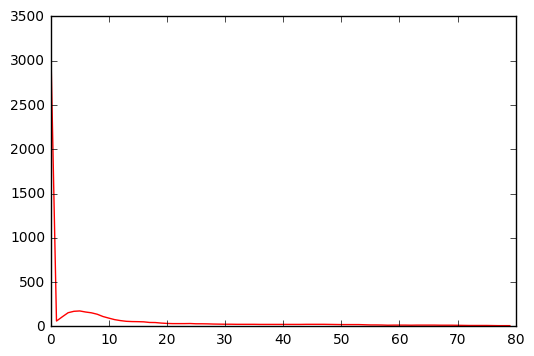

In [14]:
from matplotlib import pyplot, mlab
import numpy
import math
import random
import copy
from scipy.optimize import minimize_scalar


def get_logistic_func_derivative(w, X, Y):
    gradient = [0] * len(w)
    for i in range(0, len(X)):
        for j in range(0, len(gradient)):
            if (-Y[i] * numpy.dot(w, X[i]) > 10):
                gradient[j] += (-Y[i] * X[i][j])
            else:
                gradient[j] += math.exp(-Y[i] * numpy.dot(w, X[i])) / (1 + math.exp(-Y[i] * numpy.dot(w, X[i]))) * (-Y[i]) * X[i][j]
    return gradient


def calculate_logistic_func_error(w, X, Y):
    ans = 0
    for i in range(0, len(X)):
        if (-Y[i] * numpy.dot(w, X[i]) > 10):
            ans += (-Y[i] * numpy.dot(w, X[i]))
        else:
            ans += math.log(1 + math.exp(-Y[i] * numpy.dot(w, X[i])))
    return ans / len(X)


def calculate_logistic_func_error_fixed(learning_rate): #do not use it for your own
    global X
    global Y
    global w
    global gradient
    ans = 0
    for i in range(0, len(X)):
        if (-Y[i] * numpy.dot(numpy.array(w) - learning_rate * numpy.array(gradient), X[i]) > 10):
            ans += (-Y[i] * numpy.dot(numpy.array(w) - learning_rate * numpy.array(gradient), X[i]))
        else:
            ans += math.log(1 + math.exp(-Y[i] * numpy.dot(numpy.array(w) - learning_rate * numpy.array(gradient), X[i])))
    return ans / len(X)


def get_count_errors(w, X, Y):
    ans = 0
    for i in range(0, len(X)):
        if (numpy.dot(w, X[i]) * Y[i] < 0):
            ans += 1
    return ans


def normalize(gradient):
    length = 0
    for i in range(len(gradient)):
        length += gradient[i]**2
    if (length == 0):
        return gradient
    for i in range(0, len(gradient)):
        gradient[i] /= length
    return gradient


input = open('train.csv', 'r')
s = input.readline()
s = input.readline()
first_group = [] #0
second_group = [] #1
while (len(s) > 1):
    elem = list(map(int, s.split(',')))
    if (len(elem) != 785):
        print("CRITICAL ERROR: THE PROGRAM CANNOT READ THIS FILE")
    elif (elem[0] == 0):
        tmp = elem[1:]
        tmp.append(1)
        first_group.append(tmp)
    elif (elem[0] == 1):
        tmp = elem[1:]
        tmp.append(1)
        second_group.append(tmp)
    s = input.readline()

print(len(first_group), len(second_group))

BATCH_SIZE = 100
list_errors = []
FEATURES_NUMBER = len(first_group[0])
DATA_FOR_LEARNING_SIZE = 2050 #2050 from 1st and 2050 from 2nd
MAX_NUMBER_STEPS = 8000 // BATCH_SIZE
MIN_LOSS = 3
MATRIX_FEATURES = numpy.vstack((numpy.array(first_group), numpy.array(second_group)))
MATRIX_ANSWERS = [1] * len(first_group) + [-1] * len(second_group)


list_errors = []
steps = 0
w = numpy.array([random.random() for i in range(FEATURES_NUMBER)])
learning_rate = 1
logistic_loss = 1000000000000
general_logistic_loss = MIN_LOSS + 100
eps = 0.0001
first_momentum = numpy.array([0] * FEATURES_NUMBER)
second_momentum = numpy.zeros((FEATURES_NUMBER, FEATURES_NUMBER))
FIRST_MOMENTUM_COEFF = 0.9
SECOND_MOMENTUM_COEFF = 0.999
first_coeff_powered = FIRST_MOMENTUM_COEFF
second_coeff_powered = SECOND_MOMENTUM_COEFF
while (steps < MAX_NUMBER_STEPS and general_logistic_loss > MIN_LOSS):
    X = numpy.empty((BATCH_SIZE, 785))
    Y = []
    for i in range(0, BATCH_SIZE // 2):
        index = (steps * BATCH_SIZE // 2 + i) % DATA_FOR_LEARNING_SIZE
        X[i * 2] = numpy.array(first_group[index % len(first_group)])
        Y.append(1)
        X[i * 2 + 1] = numpy.array(second_group[index % len(second_group)])
        Y.append(-1)
    if (len(X) != BATCH_SIZE):
        print("CRITICAL ERROR")
        break
    logistic_loss = calculate_logistic_func_error(w, X, Y)
    gradient = numpy.array(get_logistic_func_derivative(w, X, Y))
    first_momentum = first_momentum * FIRST_MOMENTUM_COEFF + gradient * (1 - FIRST_MOMENTUM_COEFF)
    second_momentum = SECOND_MOMENTUM_COEFF * second_momentum + (1 - SECOND_MOMENTUM_COEFF) * (gradient.transpose() * gradient)
    first_coeff_powered *= FIRST_MOMENTUM_COEFF
    second_coeff_powered *= SECOND_MOMENTUM_COEFF
    bias_corrected_first = first_momentum / (1 - first_coeff_powered)
    new_w = copy.copy(w)
    for i in range(0, len(w)):
        new_w[i] -= learning_rate * bias_corrected_first[i] / (eps + math.sqrt(second_momentum[i][i] / (1 - second_coeff_powered)))
    w = copy.copy(new_w)
    logistic_loss = calculate_logistic_func_error(new_w, X, Y)
    steps += 1
    general_logistic_loss = get_count_errors(w, MATRIX_FEATURES, MATRIX_ANSWERS)
    #print(logistic_loss, learning_rate, general_logistic_loss)
    list_errors.append(general_logistic_loss)
print("Errors: ", general_logistic_loss, "/", len(first_group) + len(second_group))
print("Used elements: ", steps * BATCH_SIZE)
pyplot.plot([i for i in range(steps)], list_errors, "red")
pyplot.show()